### CS 178: Machine Learning &amp; Data Mining

# Discussion, Week 1

**Reminder**: see the Discussion Week 0 notebook on installing conda and jupyter, numpy, and sklearn.

## Part 1: Plotting with MatPlotLib

Let's start by importing some packages. We'll point out which of these imports we are using throughout the discussion, but it's handy to have them all in one place at the top of your notebook. This way, you can reload the imports without having to re-run everything else.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

     
seed=123
np.random.seed(seed)

If you got an error including `sklearn`, you may need to force it to upgrade to the latest stable version (currently 1.2).  To do so, you can execute the next cell.  (If it is already at the latest version, this will just print "Requirement already satisfied" messages.)

In [1]:
!pip install -U scikit-learn

This part of the discussion is a short tutorial on how to use [Matplotlib (Pyplot)](https://matplotlib.org/stable/index.html) to create highly customizable plots in Python. This discussion will only cover the bare essentials of `matplotlib` -- you are encouraged to read the [documentation](https://matplotlib.org/stable/index.html) on your own, and to explore what is possible. For your homeworks, you should use the default settings for your plots unless told otherwise.

To import `pyplot`, run the following line of code. By convention, `plt` is used as shorthand for `matplotlib.pyplot`. 


In [7]:
import matplotlib.pyplot as plt

Before creating a plot, let's first make some data.
- `x` is a numpy array containing 50 evenly spaced points in the interval $[0, 2\pi]$.
- `y` is a numpy array, where `y[i] = sin(x[i])` is the sine of the corresponding element in `x`.
    - Note that we can create `y` without a for loop by using `np.sin(...)`, which applies `sin` to all elements.
- `z` is a numpy array containing the cosine of `x`.

In [8]:
# Evenly spaced points between 0 and 1
x = np.linspace(0, 2*np.pi, 50)
x.shape

(50,)

In [9]:
x

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

In [10]:
# Compute sin(x) for every value in x
y = np.sin(x)
y.shape

(50,)

In [11]:
y

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

In [12]:
# Compute cos(x) for every value in x
z = np.cos(x)
z.shape

(50,)

Now that we have some data, we can plot our sine and cosine curves.
- Create a figure object `fig` and an axes `axes` object using `plt.subplots()`.
- `fig` is a figure which can contain many subplots ("axes").
- Here, we are creating a figure with only one subplot.
- We can modify subplots by calling various functions on the corresponding axes.
- For example, `axes.plot(x, y)` will create a line plot from the data contained in `x` and `y`.

Note that in the final line we write `axes.plot(x, y);` -- there is an extra semicolon at the end. This is just included to prevent the Jupyter notebook from printing out a representation of the last line being run. This is not necessary, but can help make your notebook look a little cleaner.

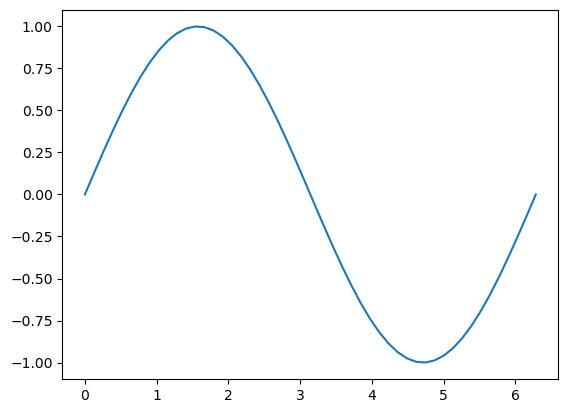

In [13]:
fig, axes = plt.subplots()  # Create figure and axes
axes.plot(x, y);            # Create line plot of x vs y
#axes.plot(x, y)            # Without semicolon -- prints out a representation of the axes object

Our plot is looking a little too empty. Let's improve our plot:
- We can label the axes using by calling the `set_xlabel(...)` and `set_ylabel(...)` functions of an `axes` object.
    - The default font size is a little small. We can use the argument `fontsize=...` to change this to our liking. If we don't pass in this argument, you'll get the default font size for your axis labels.
- We can add a title with the function `set_title(...)`.
- You can change the x-axis and y-axis limits by using the functions `set_xlim(...)` and `set_ylim(...)`. `matplotlib` will try to automatically infer these from your data, but it sometimes is useful to be able to set these manually.

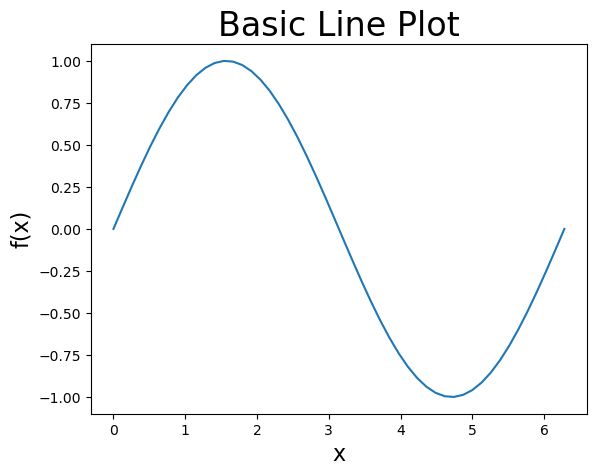

In [14]:
# Create a figure and plot y = sin(x)
fig, axes = plt.subplots()
axes.plot(x, y)

# Label the axes
#axes.set_xlabel('x')
#axes.set_ylabel('f(x)')
axes.set_xlabel('x', fontsize=16)        
axes.set_ylabel('f(x)', fontsize=16)

# Add a title to the plot
axes.set_title('Basic Line Plot', fontsize=24);

# Change the x-axis limit
#axes.set_xlim(0, 4*np.pi);

Now that you have a basic idea of how to create plots in `matplotlib`, let's look at some more complicated examples.

Recall that above, we created two arrays: `y = np.sin(x)` and `z = np.cos(x)`. Let's plot both of these as line plots in the same figure.
- We can do this by just calling `axes.plot(...)` a second time.
- We can specify the colors of our lines with the argument `color='...'` in the `axes.plot()` function. 
- When there are multiple lines in a plot, it is often a good idea to include a legend. We can specify the name of each line with the argument `label='...'` in the `axes.plot()` function, and include a new line `axes.legend()`.
- You can specify the location of the legend by passing in the argument `loc='...'` -- for example, `axes.legend(loc = 'upper right')` will make the legend appear in the top right. If no argument is specified, `matplotlib` tries to automatically infer the best position.

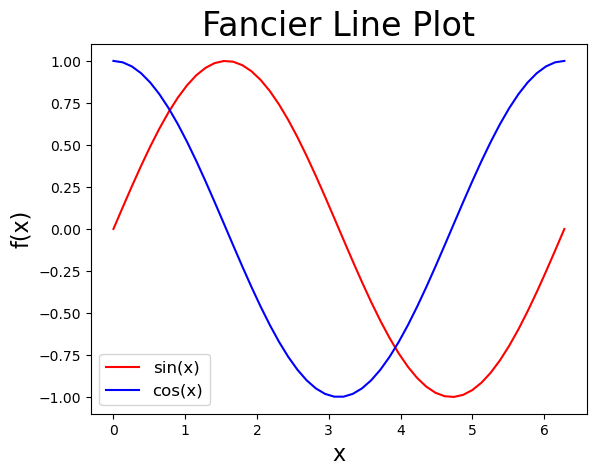

In [19]:
# Create a figure
fig, axes = plt.subplots()
axes.plot(x, y, color='red', label='sin(x)')    # <---  Plot y = sin(x)
axes.plot(x, z, color='blue', label='cos(x)')   # <---  Plot z = cos(x)

# Label the axes
axes.set_xlabel('x', fontsize=16)        
axes.set_ylabel('f(x)', fontsize=16)

# Add a title to the plot
axes.set_title('Fancier Line Plot', fontsize=24)

# Add a legend to the plot
axes.legend(fontsize=12);
#axes.legend(loc = 'best');   # Equivalent to the previous line
#axes.legend(loc = 'upper right');

So far, we've seen how to create and customize line plots. However, `matplotlib` supports many other types of plots as well. For example, scatter plots:
- To create a scatter plot, simply call `axes.scatter(...)` instead of `axes.plot(...)`.

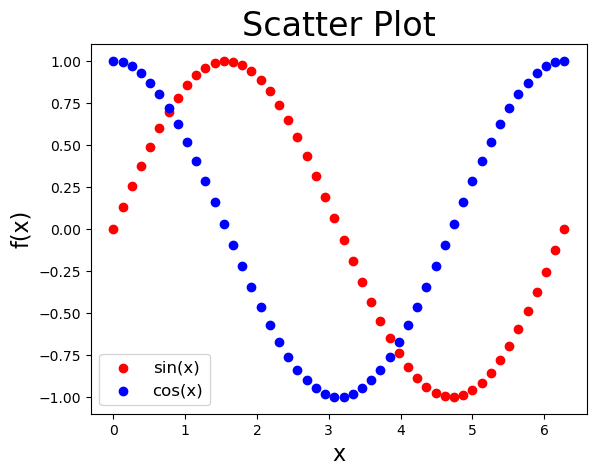

In [20]:
# Create a figure
fig, axes = plt.subplots()
axes.scatter(x, y, color='red', label='sin(x)')    # <---  Plot y = sin(x)
axes.scatter(x, z, color='blue', label='cos(x)')   # <---  Plot z = cos(x)

# Label the axes
axes.set_xlabel('x', fontsize=16)        
axes.set_ylabel('f(x)', fontsize=16)

# Add a title to the plot
axes.set_title('Scatter Plot', fontsize=24)

# Add a legend to the plot
axes.legend(fontsize=12);
#axes.legend(loc = 'best');   # Equivalent to the previous line
#axes.legend(loc = 'upper right');

You can actually make scatter plots using `plot` if you prefer, as well:

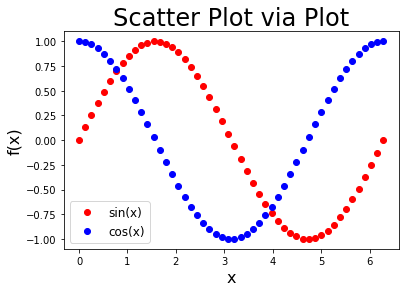

In [ ]:
# Create a figure
fig, axes = plt.subplots()
axes.plot(x, y, 'ro', label='sin(x)')    # <---  Plot y = sin(x); `ro` shorthand for "red circles"
axes.plot(x, z, 'bo', label='cos(x)')   # <---  Plot z = cos(x)

# Label the axes
axes.set_xlabel('x', fontsize=16)        
axes.set_ylabel('f(x)', fontsize=16)

# Add a title to the plot
axes.set_title('Scatter Plot via Plot', fontsize=24)

# Add a legend to the plot
axes.legend(fontsize=12);
#axes.legend(loc = 'best');   # Equivalent to the previous line
#axes.legend(loc = 'upper right');

In fact, all that `plot` is doing by default is drawing the points defined by the `x` and `y` vectors in the order they appear in those vectors, and then connecting each point to the next with a straight line.  The points are sufficiently densely located that the resulting plot looks smooth.

---

You now know how to create figures with a single subplot. In several homework problems, you will create plots that have multiple subplots. For example, let's create a figure with 4 subplots in total, in a 2x2 grid. To do this:
- Call `fig, axes = plt.subplots(2, 2)`. This will create a single figure `fig` that has our 4 subplots. `axes` will now be a list of axes objects -- for example, `axes[0,0]` corresponds to the subplot in the first row and the first column (i.e. the top left).
- To create a subplot in row `i` and column `j`, we can call the appropriate functions on `axes[i,j]`.
- Each subplot can have its own x-label, y-label, title, etc. 
- Sometimes, when we have many subplots, they can overlap. This can be fixed by calling `fig.tight_layout()` after doing the rest of our plotting.
- We can create a title for our entire figure using `fig.suptitle(...)`.

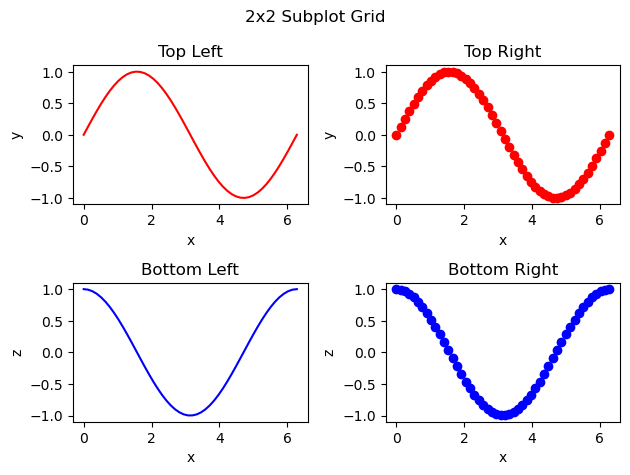

In [21]:
# Create a figure with 4 subplots -- 2 rows, 2 columns
fig, axes = plt.subplots(2, 2)

# Top left
axes[0, 0].plot(x, y, color='red')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_title('Top Left')

# Top right
axes[0, 1].scatter(x, y, color='red')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
axes[0, 1].set_title('Top Right')

# Bottom left
axes[1, 0].plot(x, z, color='blue')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('z')
axes[1, 0].set_title('Bottom Left')

# Bottom right
axes[1, 1].scatter(x, z, color='blue')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('Bottom Right')

# Create title for entire figure
fig.suptitle('2x2 Subplot Grid', fontsize=12)

# Make our subplots not overlap
fig.tight_layout()

<center> <img src="http://sli.ics.uci.edu/extras/sep.png" alt="--------------------------------------------" width="200px" height="20px" style="width:200px;height:20px;"/> </center>

## Part 2 : Scikit-Learn

In the last part of this week's discussion, you will see how to use the library `scikit-learn` (sometimes called "sklearn"), a popular package for doing machine learning in Python. You will make use of `scikit-learn` in your homeworks throughout this quarter. Importantly, `scikit-learn` is compatible with the other Python packages we have explored so far -- namely, `numpy` and `matplotlib`. 


In Dis00, we saw how to install `scikit-learn` into our `cs178` environment via `conda`. Make sure you have activated your `cs178` environment in order to make use of this package. In addition, make sure you have version 1.1 or newer.

To get started, we'll import several useful things.

In [22]:
from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

Let's generate a dataset using the function `sklearn.datasets.make_moons`. This isn't real data corresponding to any real machine learning task, but we can use it to illustrate some concepts.

This dataset has 1000 datapoints and 2 classes.

In [23]:
# Creating 2-moons dataset
n_samples = 1000
noise = 0.3
moon_X, moon_y = make_moons(n_samples, noise=noise)

In [24]:
moon_X.shape

(1000, 2)

In [25]:
moon_y.shape

(1000,)

Let's use our new `matplotlib` skills to create a scatter plot of our dataset.
- If you have an array of labels (which has the same length as the number of points you are plotting), you can easily color the points in a scatter plot using the argument `c=...` in `axes.scatter(...)`.
- Alternatively, you can call `axes.scatter(..., color=...)` to specify a particular color, e.g. using `color=red`.  
- Note that there are other ways of doing this that give you more control, e.g. let you pick the colors for each class -- but this way is pretty simple.

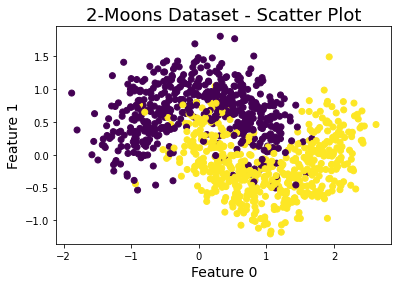

In [ ]:
# Make a figure with 1 subplot
fig, axes = plt.subplots()

# Scatter plot of features in X
feature_0 = moon_X[:, 0]  # First column is the first feature
feature_1 = moon_X[:, 1]  # Second column is the second feature

axes.scatter(feature_0, feature_1, c=moon_y)

axes.set_xlabel('Feature 0', fontsize=14)
axes.set_ylabel('Feature 1', fontsize=14)
axes.set_title('2-Moons Dataset - Scatter Plot', fontsize=18);

Next we'll visualize our dataset further by making a histogram for each of our features.
- As you might guess, we will just use the function `axes[i].hist(...)` to create a histogram.
- We also pass in the argument `edgecolor='black'`, just to help us visually separate the bins.

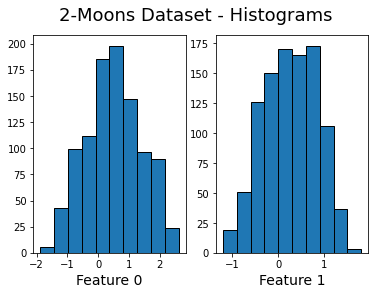

In [ ]:
# Make a figure with 2 subplots -- 1 row, 2 columns
fig, axes = plt.subplots(1, 2)

# Scatter plot of features in X
feature_0 = moon_X[:, 0]  # First column is the first feature
feature_1 = moon_X[:, 1]  # Second column is the second feature

axes[0].hist(feature_0, edgecolor='black')
axes[0].set_xlabel('Feature 0', fontsize=14)


axes[1].hist(feature_1,  edgecolor='black')
axes[1].set_xlabel('Feature 1', fontsize=14)

fig.suptitle('2-Moons Dataset - Histograms', fontsize=18);

Now that we have a better sense of what our dataset looks like, let's train some models!
- First, we'll split our dataset into a training set and a testing set.
- `scikit-learn` makes this easy: we can use the function `sklearn.model_selection.train_test_split`. This is already imported above.
- The argument `test_size=...` is a percentage, telling us how much of our data will be used for the testing set. The remaining fraction will be used for training. The argument `random_state=...` specifies a seed for the random number generator -- by setting this to a constant, we ensure that we get reproducible results (note this isn't always desirable).

In [27]:
# Create a train/test split of the 2-moons dataset
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(moon_X, moon_y, test_size=test_size, random_state=seed)

In [28]:
X_train.shape

(750, 2)

In [29]:
X_test.shape

(250, 2)

Now, we can create a nearest centroid classifier and fit it on the training data.
- We'll use the sklearn implementation, which is already imported for you with `from sklearn.neighbors import NearestCentroid`.
- After creating a classifier with `NearestCentroid()`, fitting it to the training data is as easy as calling the function `.fit(...)`.
- See the [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html) for more details on this classifier.

In [35]:
# Create a nearest centroid classifier
nc_classifier = NearestCentroid()

# Fit it on the training set
nc_classifier.fit(X_train, y_train);

After training our classifier, let's use it to make predictions.
- We can do this using the method `.predict(...)`.
- We can call the `.predict(...)` method on both the training data and the testing data, in order to make predictions on both sets.

In [36]:
# Make predictions on the training set
y_pred_train = nc_classifier.predict(X_train)

# Make predictions on the testing set
y_pred_test = nc_classifier.predict(X_test)

Let's now see how accurate our predictions are.
- In this discussion, we'll use the sklearn function, which is already imported for you via `from sklearn.metrics import accuracy_score`.
- See [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) for the documentation for this function.
- In Homework 1, you will implement your own accuracy metric from scratch.

In [37]:
# Compute accuracy of predictions on train set
acc_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy (train): {acc_train}')

Accuracy (train): 0.8026666666666666


In [38]:
# Compute accuracy of predictions on test set
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy (train): {acc_test}')

Accuracy (train): 0.76


In Homework 1, you are also asked to visualize some decision boundaries. Here's a short demonstration on how to do this.
- You can use the function `DecisionBoundaryDisplay`. This is already imported for you above: `from sklearn.inspection import DecisionBoundaryDisplay`.
- Using the method `.from_estimator(...)`, we can automatically visualize the decision boundaries by passing in a classifier (here, `nc_classifier`) and some data (`X_train`). The argument `response_method='predict'` ensures we are visualizing the "hard" decision boundaries (i.e. not class probabilities), and the argument `alpha=0.5` changes the opacity of the plot.

We see that the nearest centroid classifier has a linear decision boundary, which doesn't fit our dataset very well.

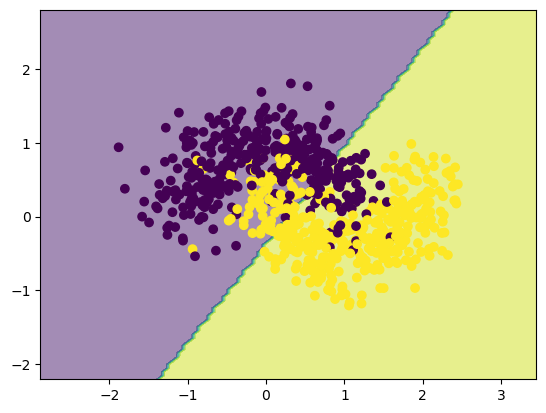

In [39]:
# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(nc_classifier, X_train, response_method='predict', alpha=0.5)
# Also include a scatter a plot of the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

The nearest centroid classifier gets decent accuracy, but let's see if we can get better performance with a kNN classifier.
- We'll use the sklearn implementation, which is already imported for you with `from sklearn.neighbors import KNeighborsClassifier`.
- You can create a kNN classifier with `k` neighbors by calling `KNeighborsClassifier(n_neighbors=k)`.
- See [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for the documentation of this classifier.
- Fitting the model and making predictions is the same as before: we just use the `.fit(...)` and `.predict(...)` methods.

In [62]:
# Create a nearest centroid classifier
k = 10
# Can also try k = 10, 25, 100, etc.
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit it on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = knn_classifier.predict(X_train)

# Make predictions on the testing set
y_pred_test = knn_classifier.predict(X_test)

In [63]:
# Compute accuracy of predictions on train set
acc_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy (train): {acc_train}')

Accuracy (train): 0.9306666666666666


In [64]:
# Compute accuracy of predictions on test set
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy (train): {acc_test}')

Accuracy (train): 0.924


As above, we can plot our decision boundary for our kNN classifier. 
- Visually, this is a much better fit than the nearest centroid classifier. 
- Note also that this is reflected in the higher accuracy of the kNN model.

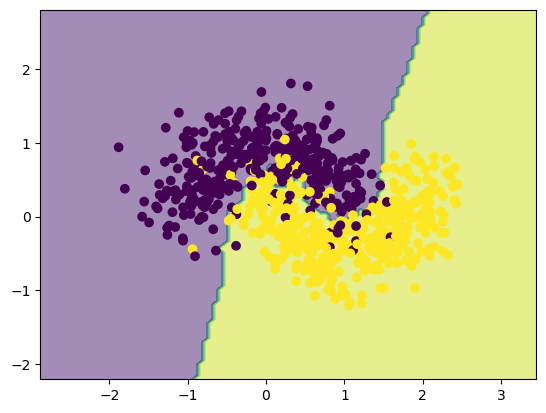

In [69]:
# Plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(knn_classifier, X_train, response_method='predict', alpha=0.5)
# Also include a scatter a plot of the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

### Visualizing Regression Learners

For regression problems, plotting the decision function is relatively easier, and we can just do it manually instead of needing the `DecisionBoundaryDisplay` object.  Let's see how we can use the plotting from earlier to do it.

First, we'll give ourselves a few data points to look at:

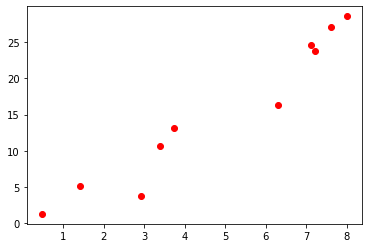

In [18]:
X = np.array([0.48, 1.41, 2.92, 3.39, 3.74, 6.31, 7.12, 7.22, 7.6 , 7.99]).reshape(-1,1)
y = np.array([ 1.28,  5.18,  3.77, 10.6 , 13.21, 16.31, 24.63, 23.81, 27.11, 28.59])
plt.plot(X,y,'ro');

We can define our regression learner and fit it to our training data.  Let's use 5 neighbors to make it a bit interesting:

In [23]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X,y);

As usual, if we just want to know how well our learner predicts the training data, we can use `predict`:

In [24]:
yhat = knr.predict(X)
print(f'MSE (Training): {((y-yhat)**2).mean()}')

MSE (Training): 15.861949200000002


We can see what the predictions at those **points** are using similar code:

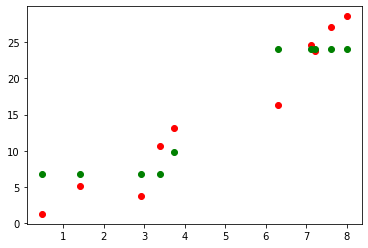

In [25]:
plt.plot(X,y,'ro', X,yhat,'go');

But it's hard to tell what the prediction function looks like. To **visualize** what our learner's prediction function looks like, we can ask our learner to predict at a large number of evenly spaced points in the feature space:

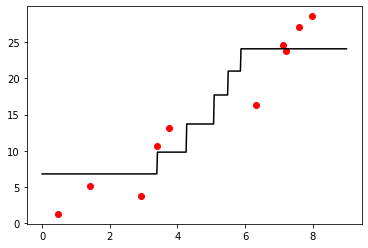

In [28]:
x_spaced = np.linspace(0,9,500).reshape(-1,1)
y_spaced = knr.predict(x_spaced)
plt.plot(X,y,'ro', x_spaced, y_spaced,'k-');

Now we see the characteristic piecewise-constant prediction function of a nearest-neighbor model.

<center> <img src="http://sli.ics.uci.edu/extras/sep.png" alt="--------------------------------------------" width="200px" height="20px" style="width:200px;height:20px;"/> </center>

## Part 3 : Questions?

### Additional Resources
- [Matplotlib Cheatsheets](https://matplotlib.org/cheatsheets/)
- [Scikit-Learn Docs](https://scikit-learn.org/stable/)
- [Scipy Lecture Notes](http://scipy-lectures.org/)